#Importing Necessary Libraries

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=d2565646b40adb838bfc0e887780e40ace32f87ce0b88d011e13bf1477e38dc2
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Defining and configuring Google Play Scraper library

In [ ]:
jd_users_reviews = reviews_all(
    'com.justdial.search',
    sleep_milliseconds=0,
    lang='en', 
    country='in', 
    sort=Sort.NEWEST, # Default is Sort.MOST_RELEVANT.
)

# Converting collected reviews data into dataframe

In [ ]:
df_reviews = pd.DataFrame(np.array(jd_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,7b9e04fa-5b28-4947-b9c2-3ec4d85e5019,Surya Smart,https://play-lh.googleusercontent.com/a-/AOh14...,There is not an option for 0 star. They are th...,1,0,7.8.1,2022-06-28 16:03:44,None,NaT
1,c68b1d66-511c-4d9a-bd68-24248066ec78,Vishal Rastogi,https://play-lh.googleusercontent.com/a-/AOh14...,v good,5,0,7.5.8,2022-06-28 15:48:09,None,NaT
2,8083ac47-81ce-4087-91a5-5c0f6e123268,Bathala enterprises & bathala homes,https://play-lh.googleusercontent.com/a-/AOh14...,Worst service worst communication,1,0,None,2022-06-28 15:01:06,None,NaT
3,785a573f-db62-4dd1-9de9-d385369abe18,Prashanth Gaming Zone,https://play-lh.googleusercontent.com/a-/AOh14...,maintain help web,4,0,7.8.1,2022-06-28 14:52:37,None,NaT
4,040fe505-9403-4acc-908c-ea4d5962aed3,aditya Kulkarni,https://play-lh.googleusercontent.com/a-/AOh14...,JUSTDIAL India ki Froud Company hai Jo Employe...,1,0,7.5.8,2022-06-28 14:50:21,None,NaT


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109963 entries, 0 to 109962
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              109963 non-null  object        
 1   userName              109963 non-null  object        
 2   userImage             109963 non-null  object        
 3   content               109624 non-null  object        
 4   score                 109963 non-null  int64         
 5   thumbsUpCount         109963 non-null  int64         
 6   reviewCreatedVersion  78364 non-null   object        
 7   at                    109963 non-null  datetime64[ns]
 8   replyContent          22006 non-null   object        
 9   repliedAt             22006 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 8.4+ MB


In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

5    73254
1    16379
4    13869
3     4321
2     2139
0        1
Name: score, dtype: int64

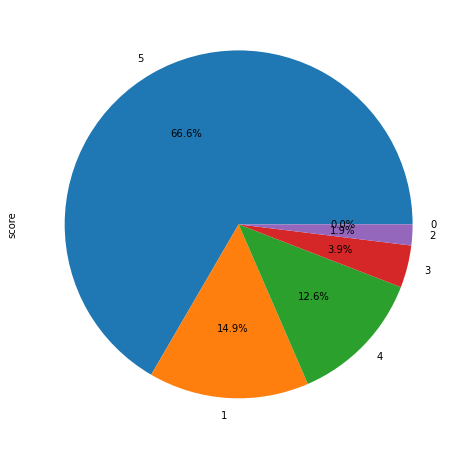

In [ ]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

# Downloading the CSV file in drive

In [ ]:
# Writing to a text file
df_reviews.to_csv('jd_reviews.csv', sep='\t')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import shutil

#shutil.copy("/content/jd_reviews.csv","/content/drive/MyDrive/Web Scarped Data")

'/content/drive/MyDrive/Web Scarped Data/jd_reviews.csv'

Total of 109962 reviews are scraped
